## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### TOP 5 RECORDS

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset.

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates values in the dataset.

### 3.3 Check data types

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of the dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### **Insight**

- The mean for math_score, reading_score, writing_score is too close to each other that is in between 66 to 68.05
- The standard deviation is also close of all the above columns that is in between of 14.6 to 15.19 
- While there is a significant difference b/w the minimum values of each column

### 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in gender column:", end=" ")
print(df['gender'].unique())

print("\nCategories in raceethnicity column:", end=" ")
print(df['race_ethnicity'].unique())

print("\nCategories in parental level of education column:", end=" ")
print(df['parental_level_of_education'].unique())

print("\nCategories in lunch column:", end=" ")
print(df['lunch'].unique())

print("\nCategories in test preparation course column:", end=" ")
print(df['test_preparation_course'].unique())

Categories in gender column: ['female' 'male']

Categories in raceethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch column: ['standard' 'free/reduced']

Categories in test preparation course column: ['none' 'completed']


In [13]:
# DEFINE NUMERICAL AND CATEGORICAL COLUMNS
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

numeric_features = [col for col in df.columns if df[col].dtype != 'O']

print('We have {} categorical columns: {}'.format(len(categorical_features),categorical_features))
print('We have {} numerical columns: {}'.format(len(numeric_features),numeric_features))

We have 5 categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
We have 3 numerical columns: ['math_score', 'reading_score', 'writing_score']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [17]:
df['Total_score'] = df['math_score']+df['reading_score'] +df['writing_score']
df['Average_score'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [34]:
## NO. OF STUDENTS WITH THE FULL SCORE
math_full = df[df['math_score'] == 100]['Average_score'].count()
reading_full = df[df['reading_score'] == 100]['Average_score'].count()
writing_full = df[df['writing_score'] == 100]['Average_score'].count()

print("Number of students with full marks in Maths: ",math_full)
print("Number of students with full marks in reading: ",reading_full)
print("Number of students with full marks in writing: ",writing_full)

Number of students with full marks in Maths:  7
Number of students with full marks in reading:  17
Number of students with full marks in writing:  14


In [35]:
## NO. OF STUDENTS WITH THE FULL SCORE
math_less_20 = df[df['math_score'] <= 20]['Average_score'].count()
reading_less_20 = df[df['reading_score'] <= 20]['Average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average_score'].count()

print("Number of students with marks less than or equal to 20 in Maths: ",math_less_20)
print("Number of students with marks less than or equal to 20 in reading: ",reading_less_20)
print("Number of students with marks less than or equal to 20 in writing: ",writing_less_20)

Number of students with marks less than or equal to 20 in Maths:  4
Number of students with marks less than or equal to 20 in reading:  1
Number of students with marks less than or equal to 20 in writing:  3


### **Insight**
- From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

## 4. Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

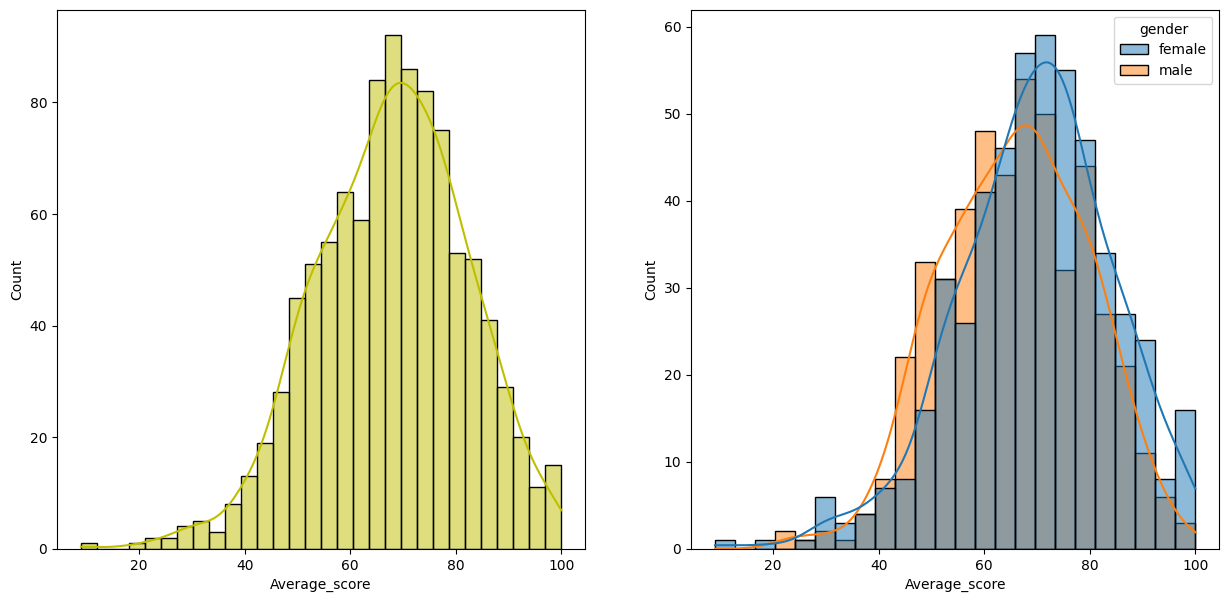

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average_score', bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=df, x='Average_score',kde=True,hue='gender')
plt.show()

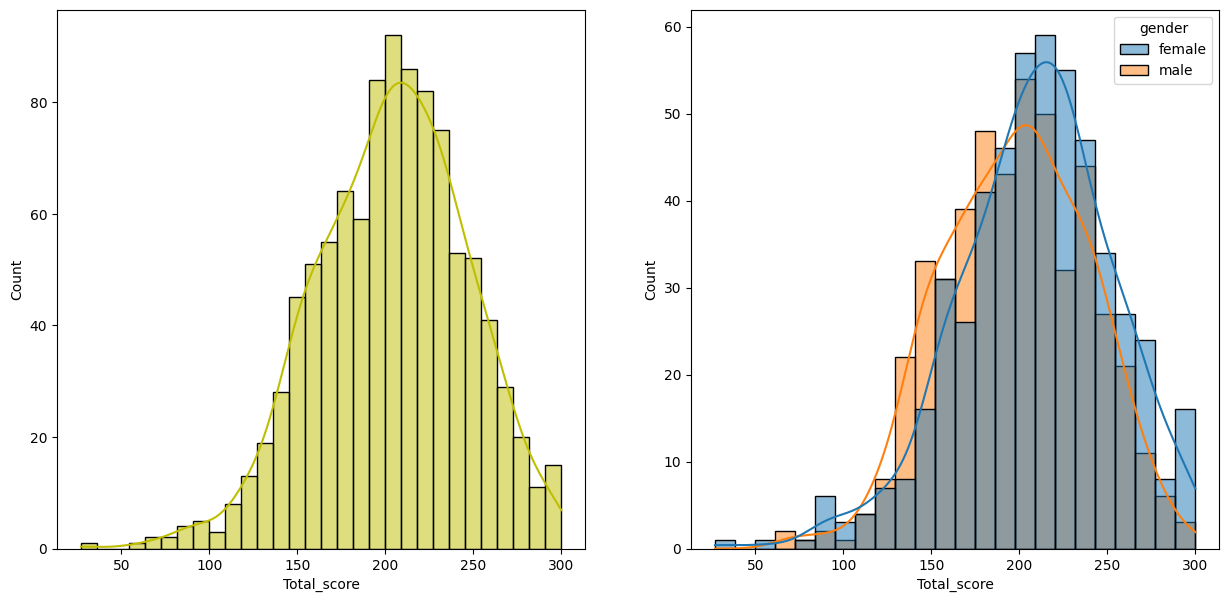

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total_score', bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=df, x='Total_score',kde=True,hue='gender')
plt.show()

### **Insight**
- females scores more than the male students

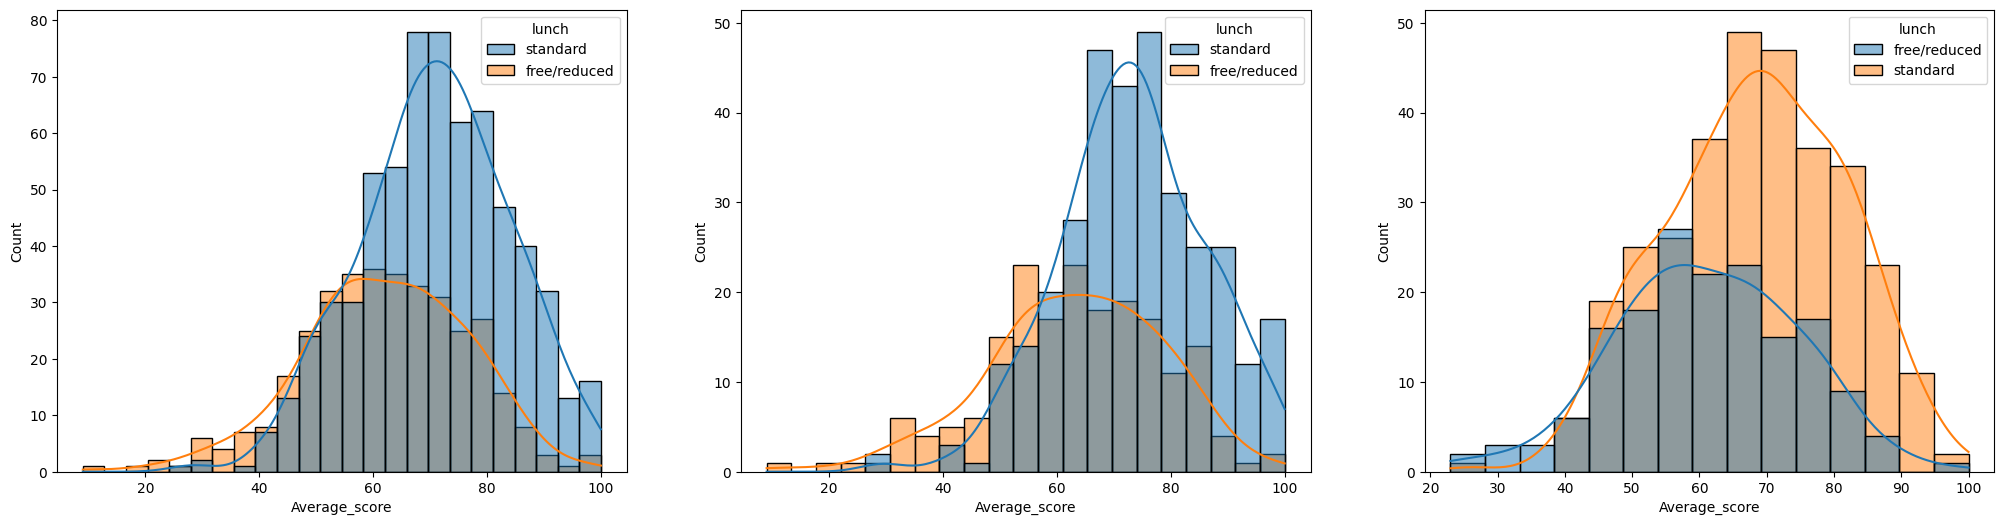

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Average_score',kde=True,hue='lunch')
plt.show()

### **Insight**
- Standard lunch helps students to perform well in exams.
- Standard lunch helps perform well in exams independent of gender of student.

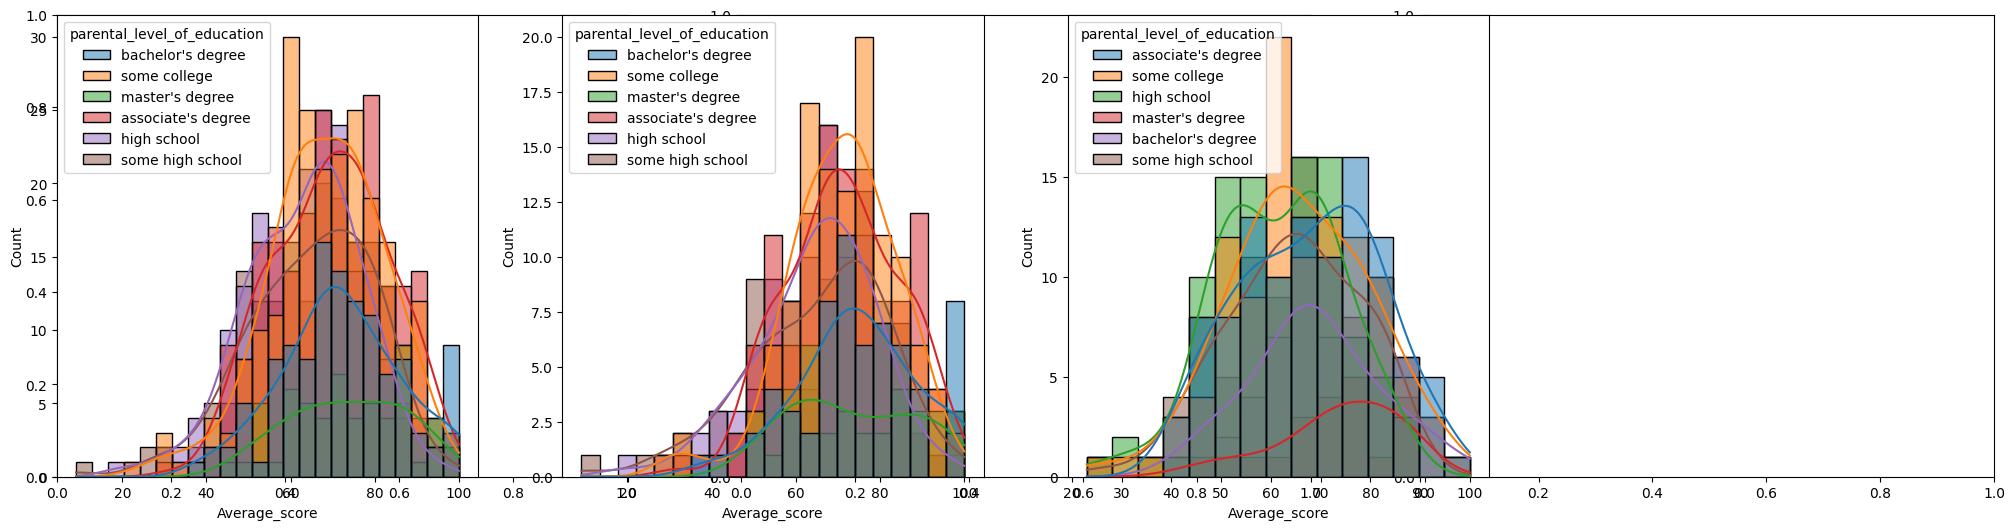

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.show()

####  **Insights**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

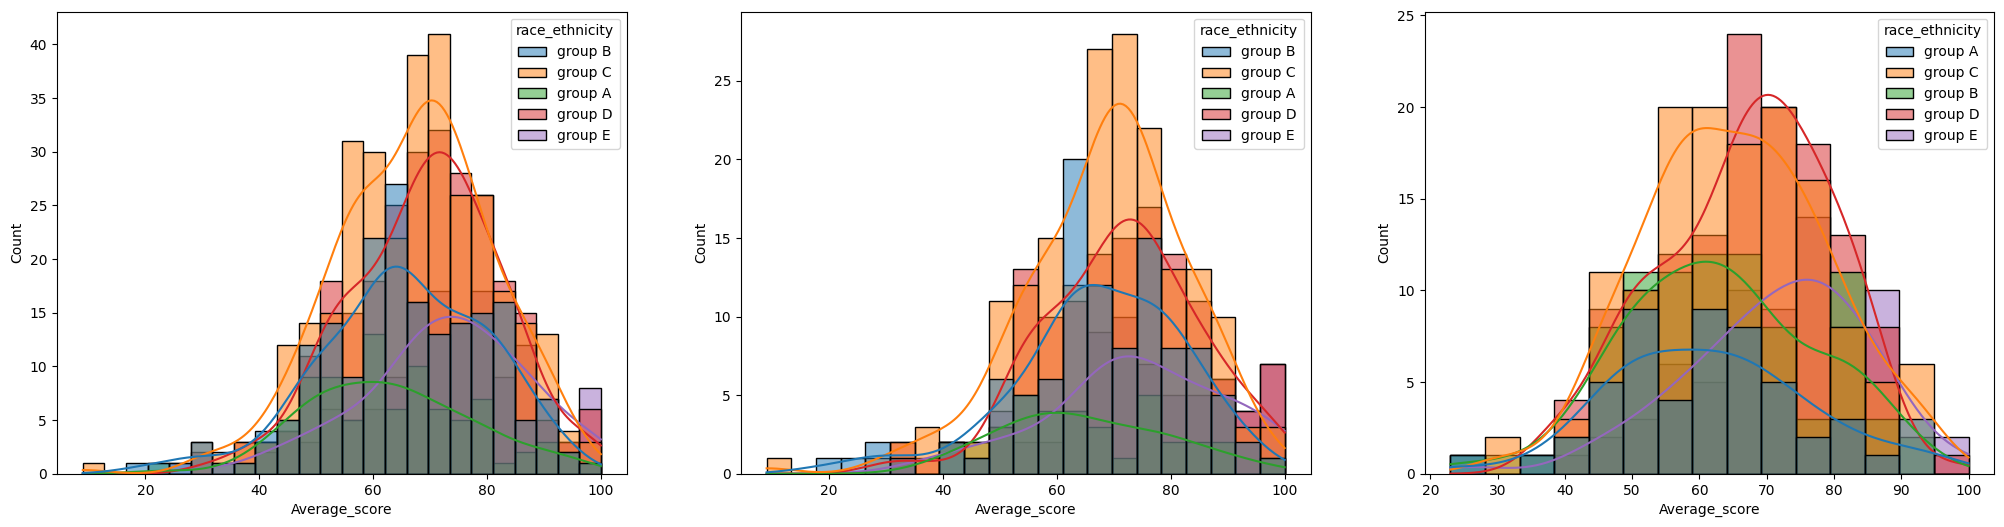

In [55]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.show()

###  **Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

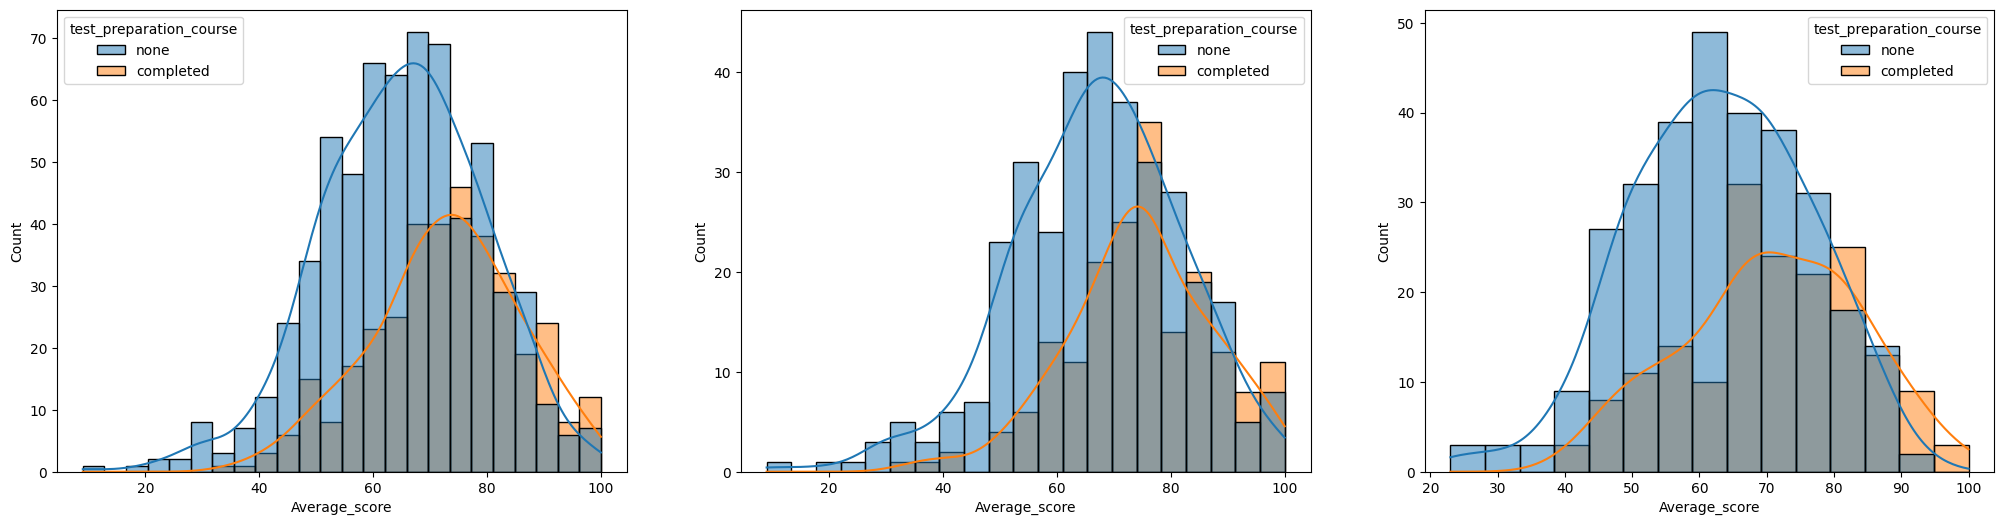

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Average_score',kde=True,hue='test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Average_score',kde=True,hue='test_preparation_course')
plt.show()

### **Insight**
- As usual the one who completed the course get higher marks irrespective of gender

### 4.2 Violin plot of marks in all three subject

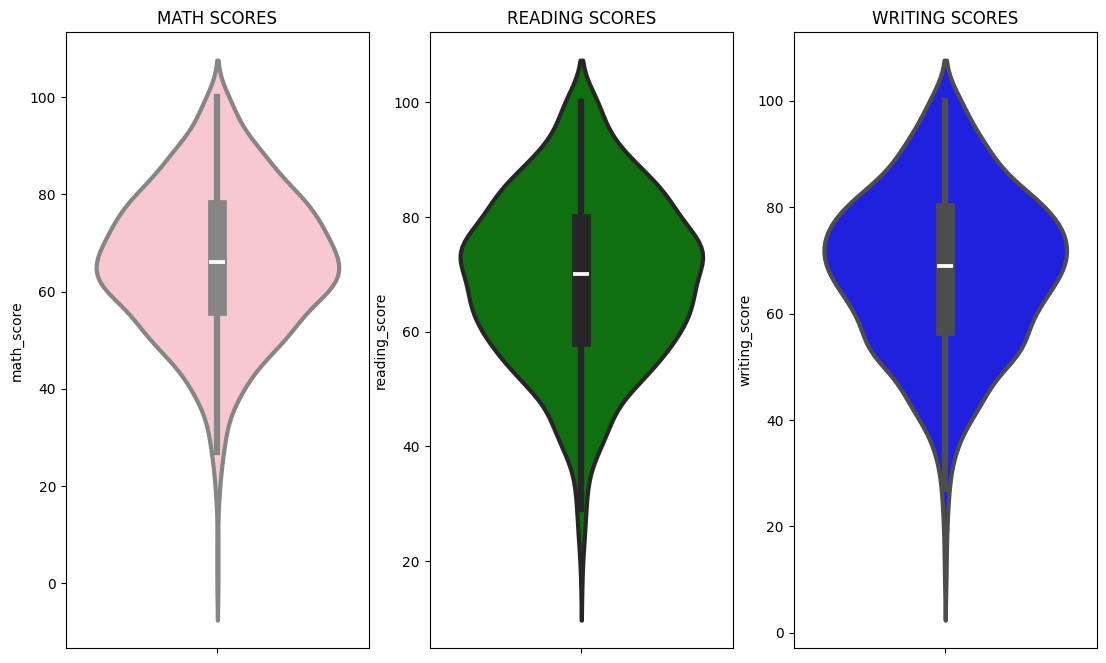

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORES")
sns.violinplot(data=df,y='math_score',color='pink',linewidth=3)
plt.subplot(1,4,2)
plt.title("READING SCORES")
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("WRITING SCORES")
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

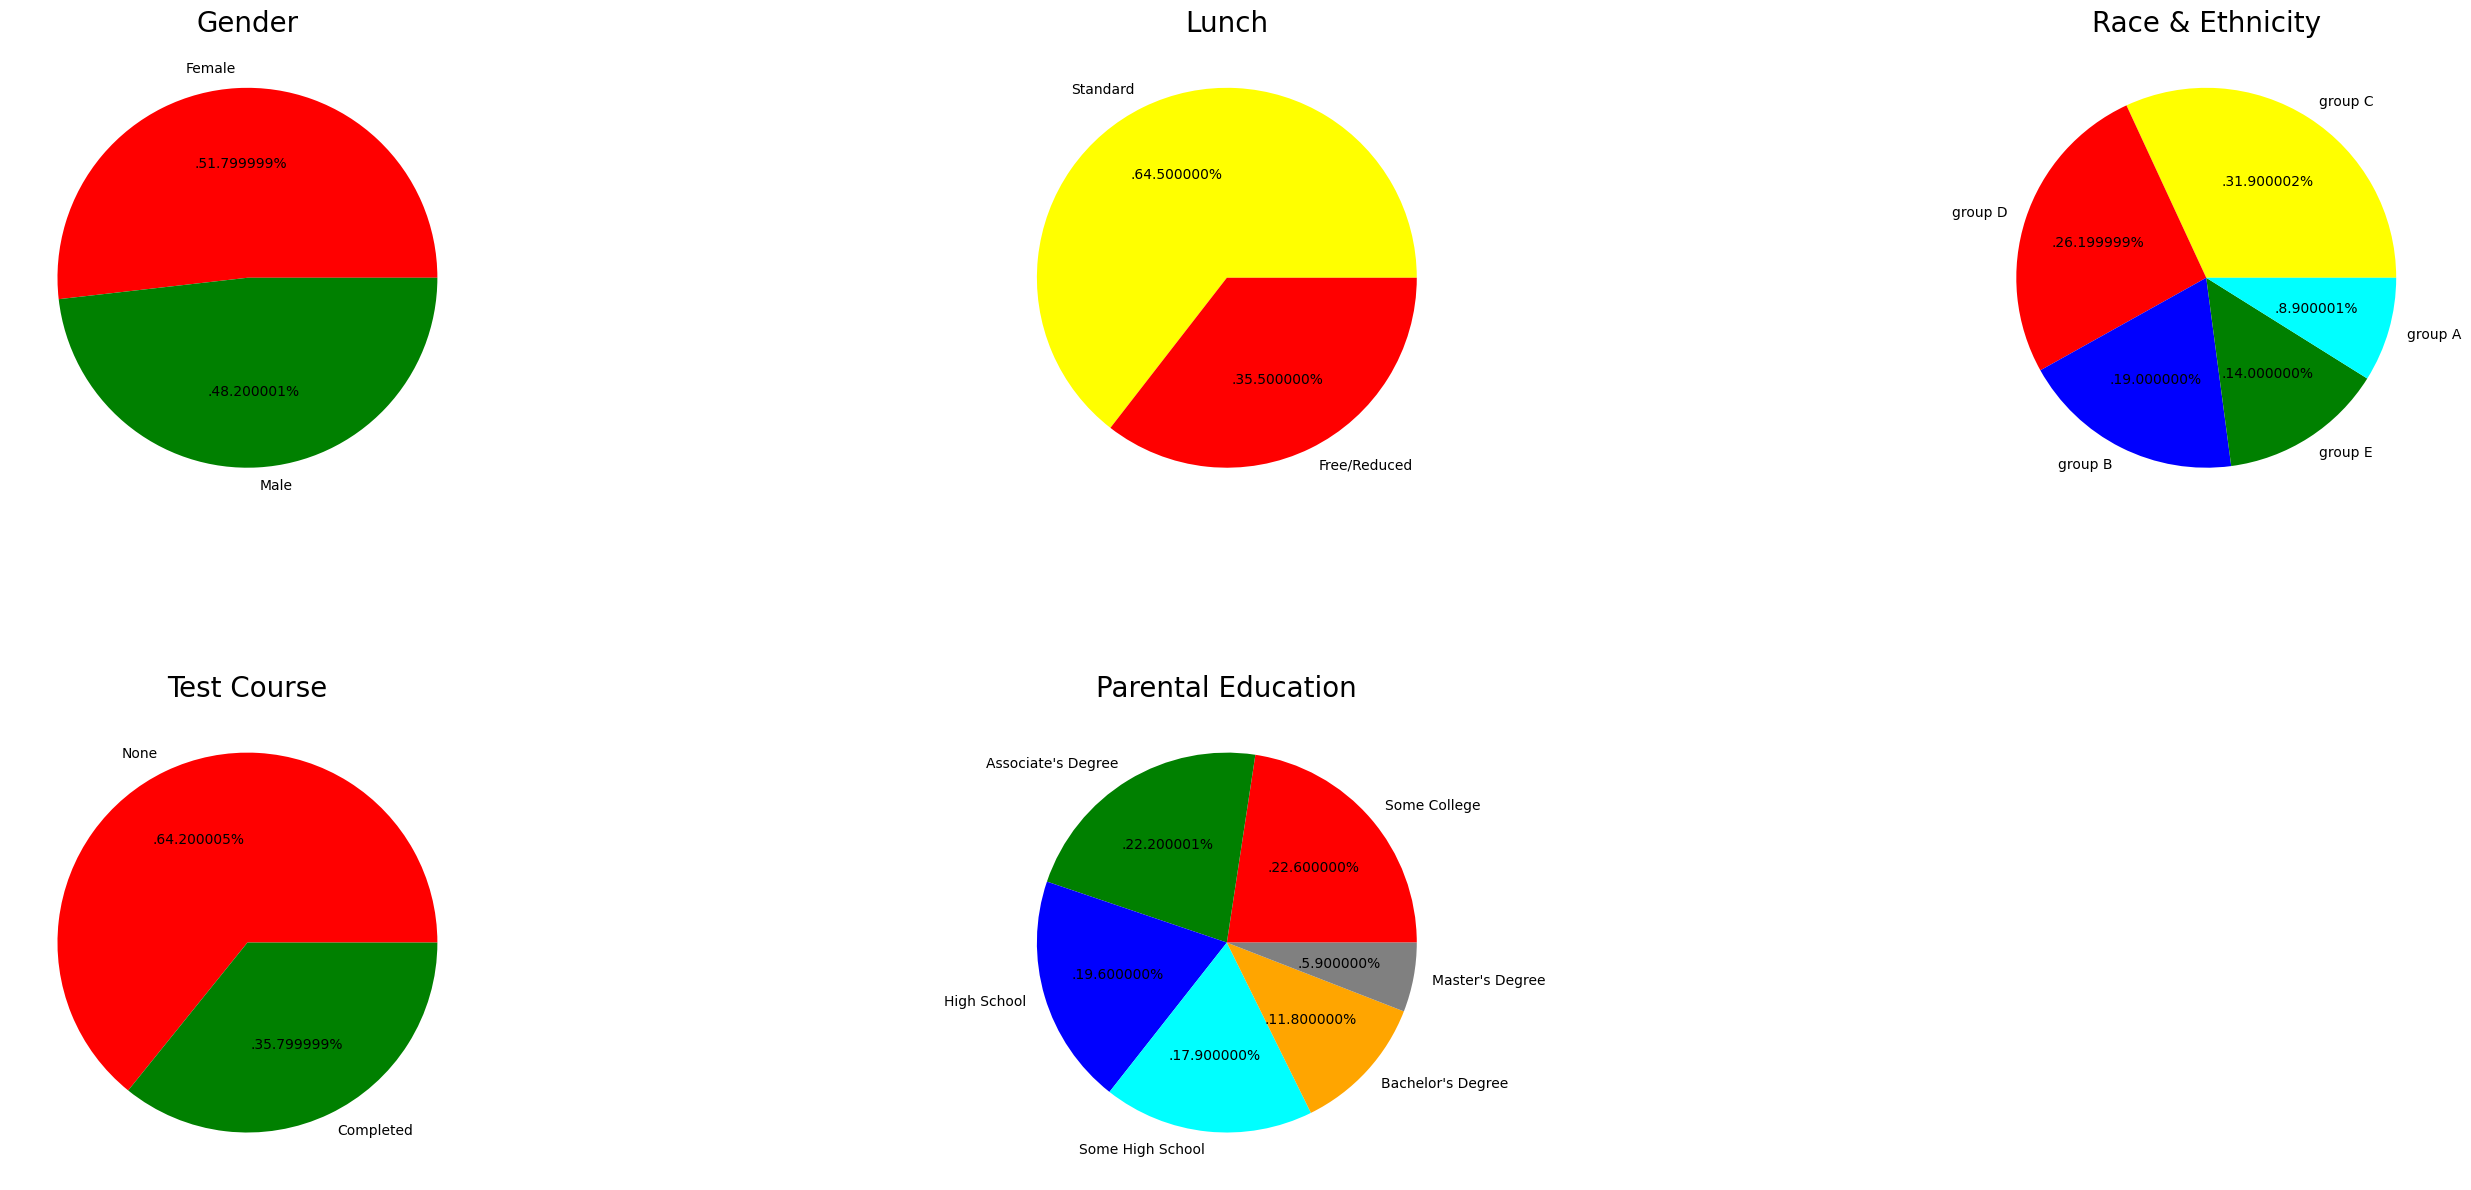

In [76]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(2,3,2)
size = df['lunch'].value_counts()
label = 'Standard','Free/Reduced'
color = ['yellow', 'red']

plt.pie(size, colors=color, labels= label, autopct=".%2f%%")
plt.title("Lunch", fontsize=20)
plt.axis("off")


plt.subplot(2,3,3)
size = df['race_ethnicity'].value_counts()
label = 'group C', 'group D', 'group B', 'group E', 'group A'
color = ['yellow', 'red', 'blue', 'green', 'cyan']

plt.pie(size, colors=color, labels= label, autopct=".%2f%%")
plt.title("Race & Ethnicity", fontsize=20)
plt.axis("off")


plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.grid()
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 Gender column
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

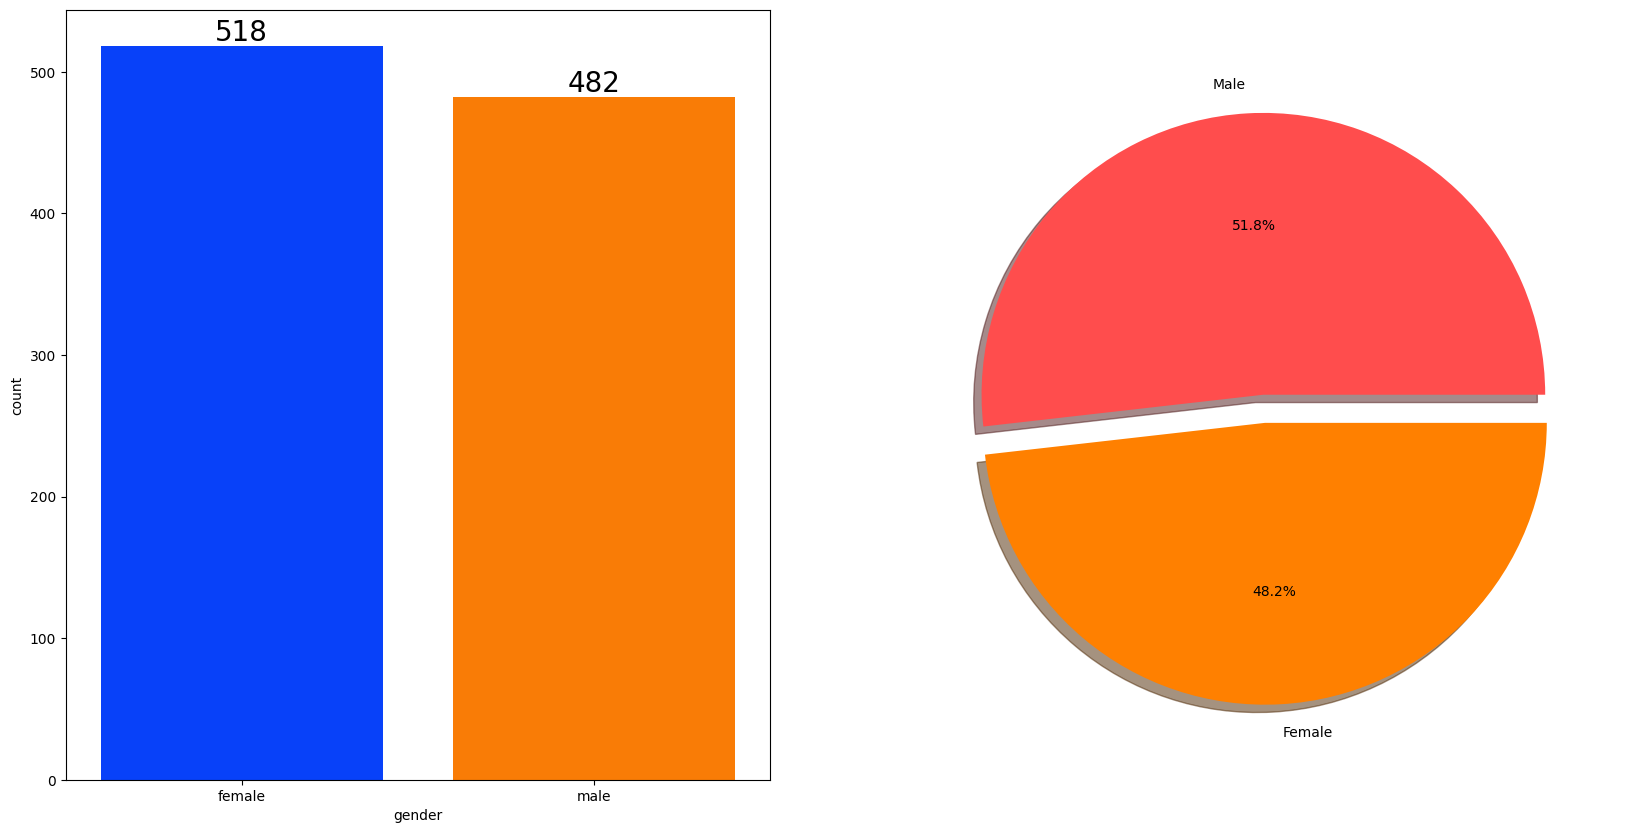

In [84]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### **Insights** 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [99]:
all_num_features = ['math_score','reading_score','writing_score','Total_score', 'Average_score']
gender_group = df.groupby('gender')[all_num_features].mean()
gender_group.rename(columns={
                    'math_score':'math_avg',
                    'reading_score':'reading_avg',
                    'writing_score':'writing_avg'},inplace=True)
gender_group

,math_avg,reading_avg,writing_avg,Total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [96]:
gender_group['Average_score'][0]

np.float64(69.56949806949807)

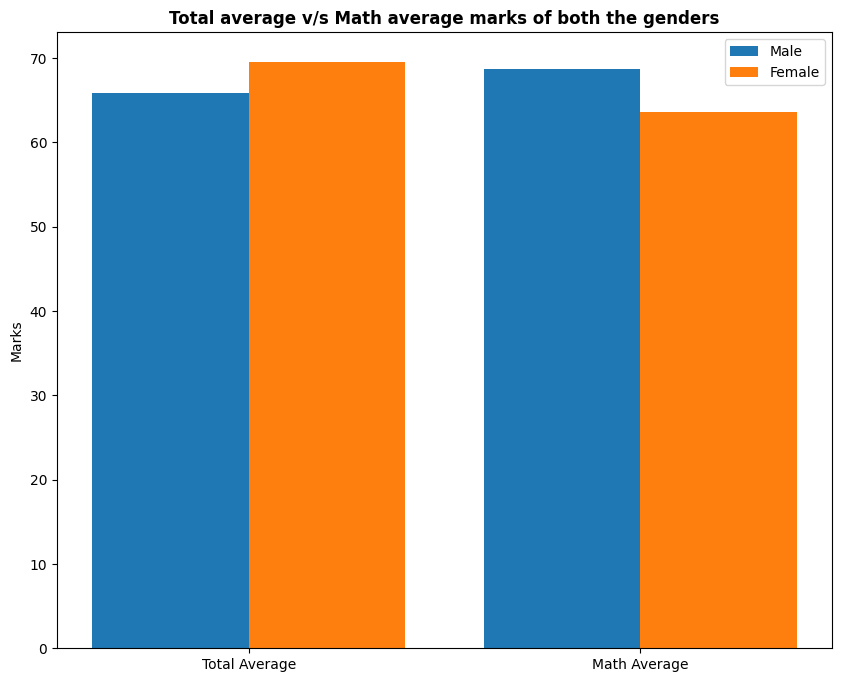

In [ ]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['Average_score'][0], gender_group['math_avg'][0]]
male_scores = [gender_group['Average_score'][1], gender_group['math_avg'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores,width=0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores,width=0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### **Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

([<matplotlib.patches.Wedge at 0x23e3a977dd0>,
 [Text(0.6461720141062023, 1.0111684964366394, 'group C'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group D'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group B'),
  Text(0.5952332509117034, -0.9250391218803047, 'group E'),
  Text(1.0572819245745813, -0.30357030811307883, 'group A')],
 [Text(0.3769336748952847, 0.5898482895880396, '31.9%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.2%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.0%'),
  Text(0.3246726823154745, -0.5045667937528934, '14.0%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.9%')])

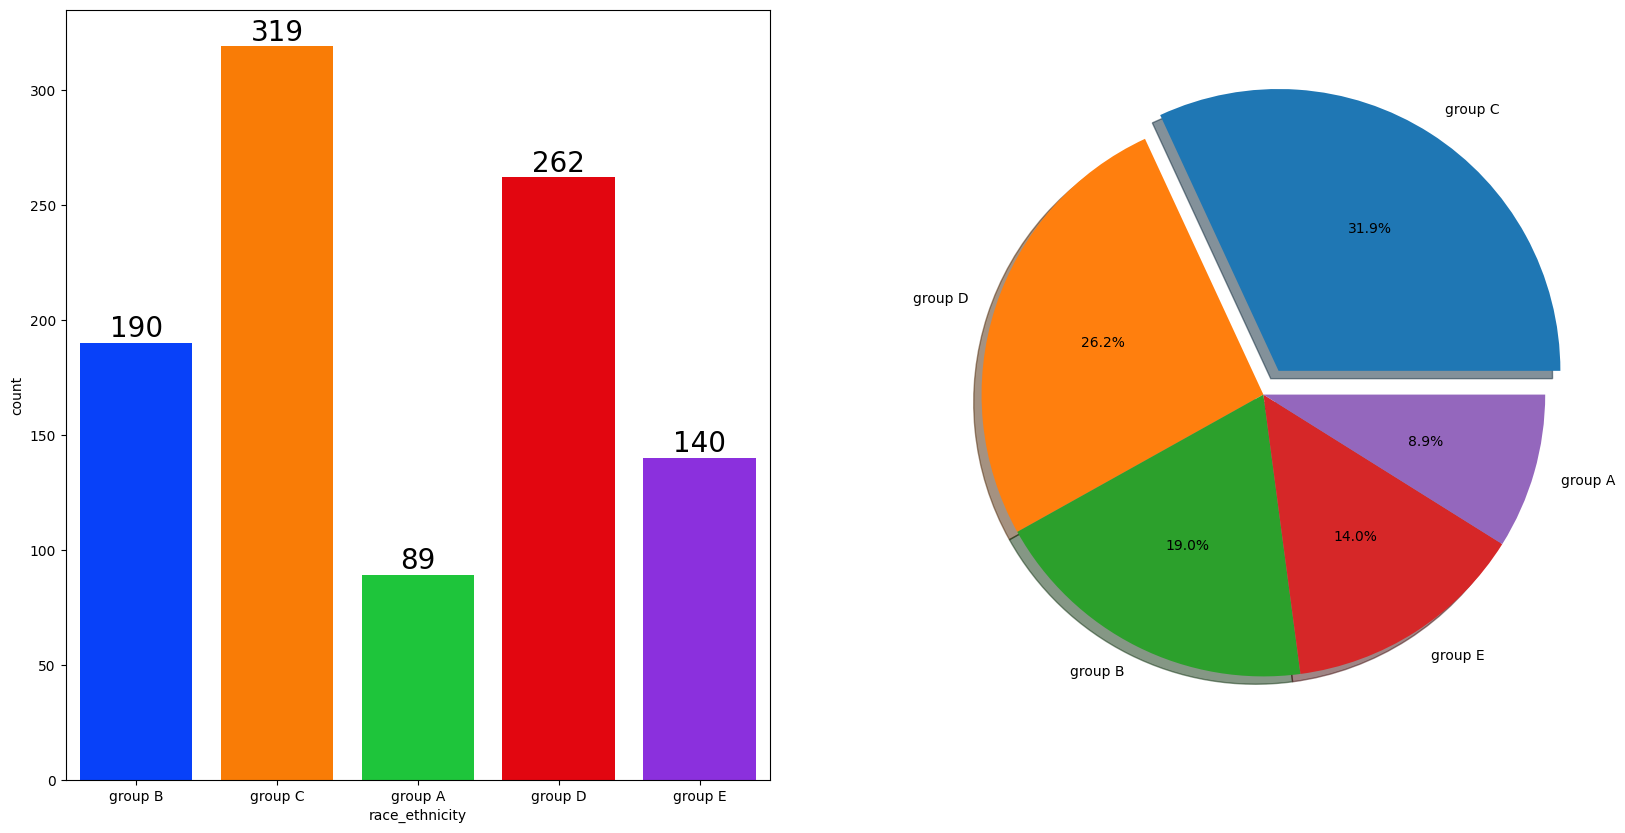

In [109]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct="%1.1f%%",shadow=True)


### **Insights** 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [113]:
race_ethnicity_group = df.groupby('race_ethnicity')[all_num_features].mean()
race_ethnicity_group.rename(columns={
                    'math_score':'math_avg',
                    'reading_score':'reading_avg',
                    'writing_score':'writing_avg'},inplace=True)
race_ethnicity_group

,math_avg,reading_avg,writing_avg,Total_score,Average_score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


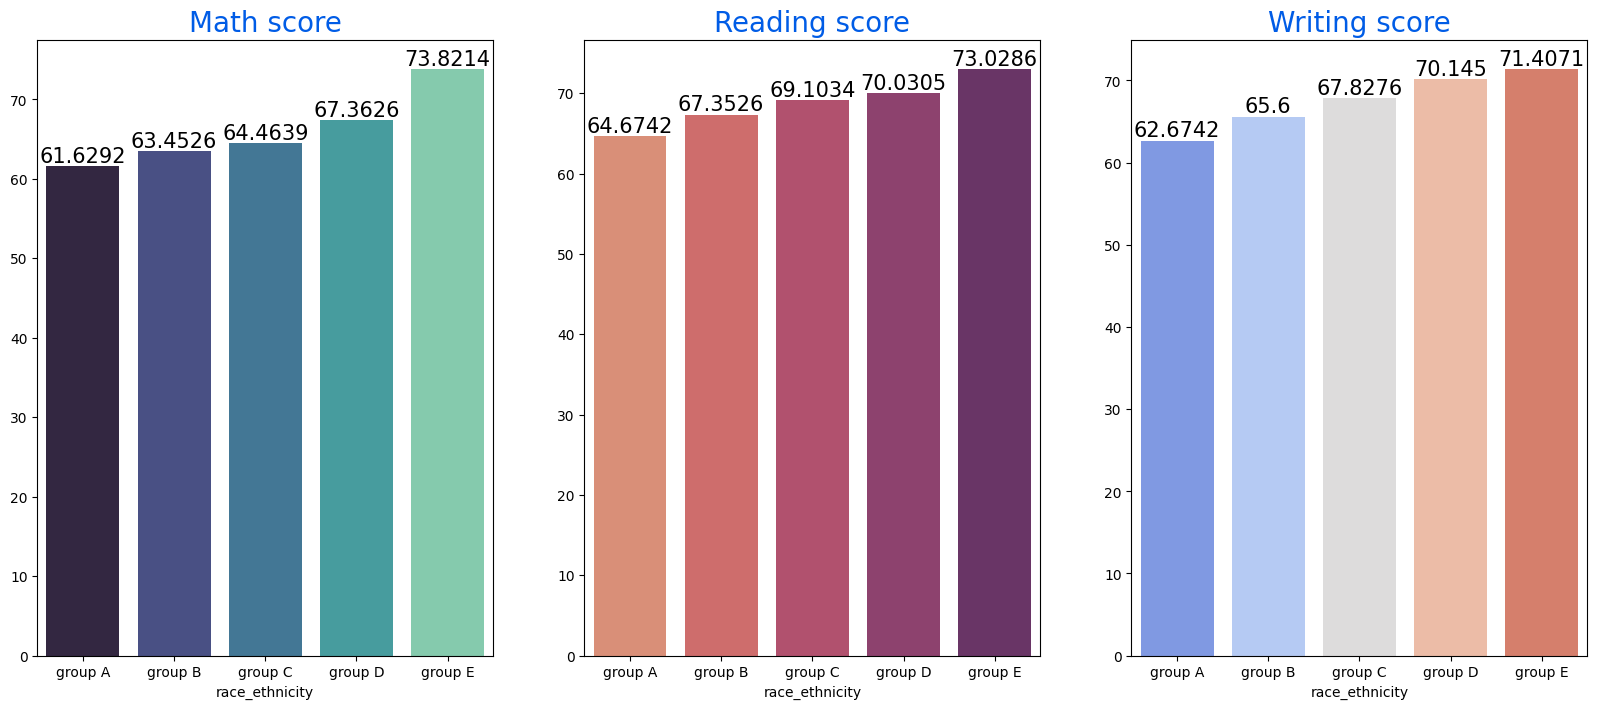

In [124]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_ethnicity_group['math_avg'].index,y=race_ethnicity_group['math_avg'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['reading_avg'].index,y=race_ethnicity_group['reading_avg'].values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['writing_avg'].index,y=race_ethnicity_group['writing_avg'].values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### **Insights** 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

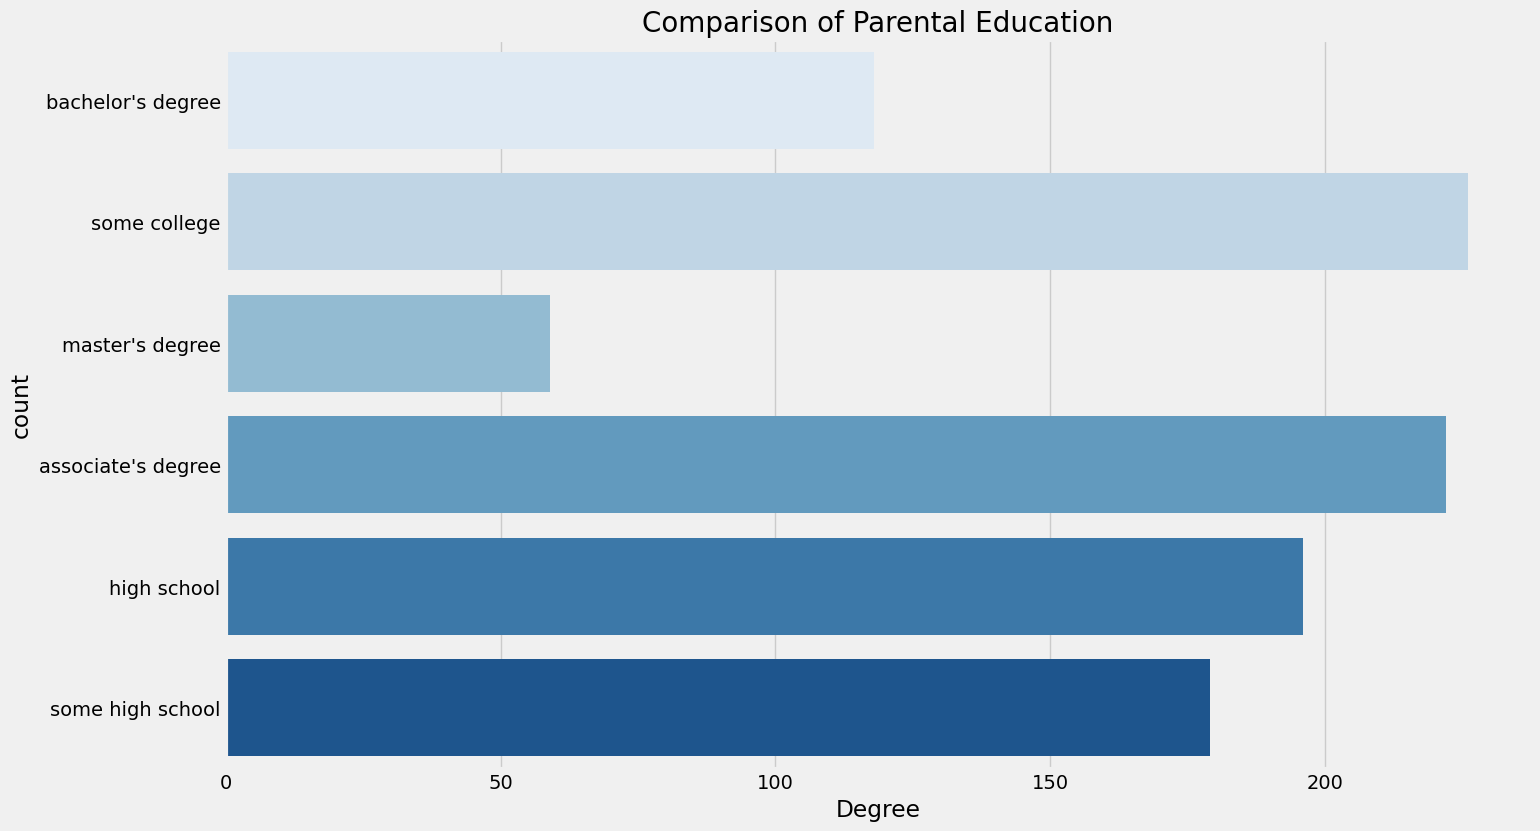

In [129]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### **Insights**
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
parent_education_group = df.groupby('parental_level_of_education')[all_num_features].mean()
parent_education_group

,math_score,reading_score,writing_score,Total_score,Average_score
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


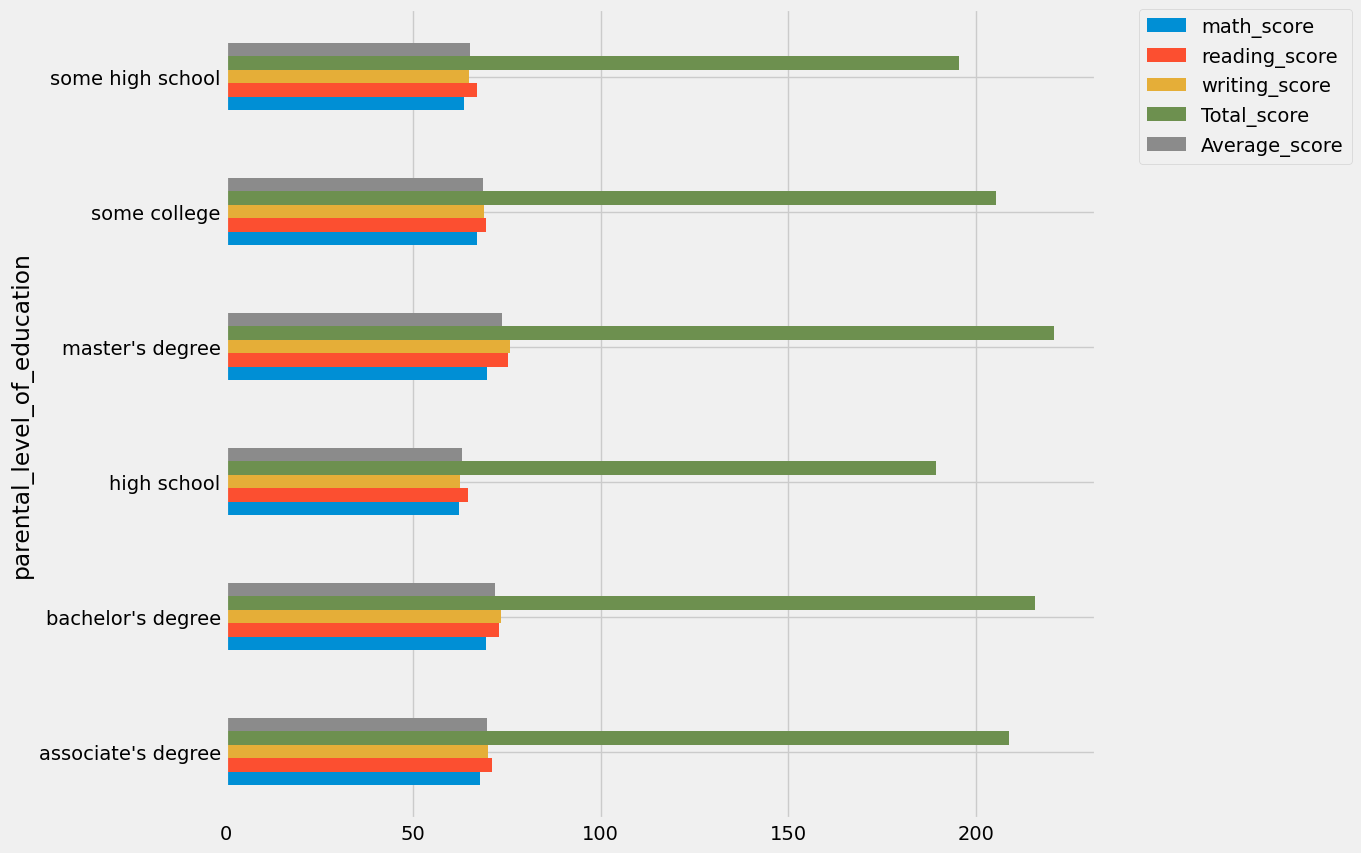

In [134]:
parent_education_group.plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### **Insights** 
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

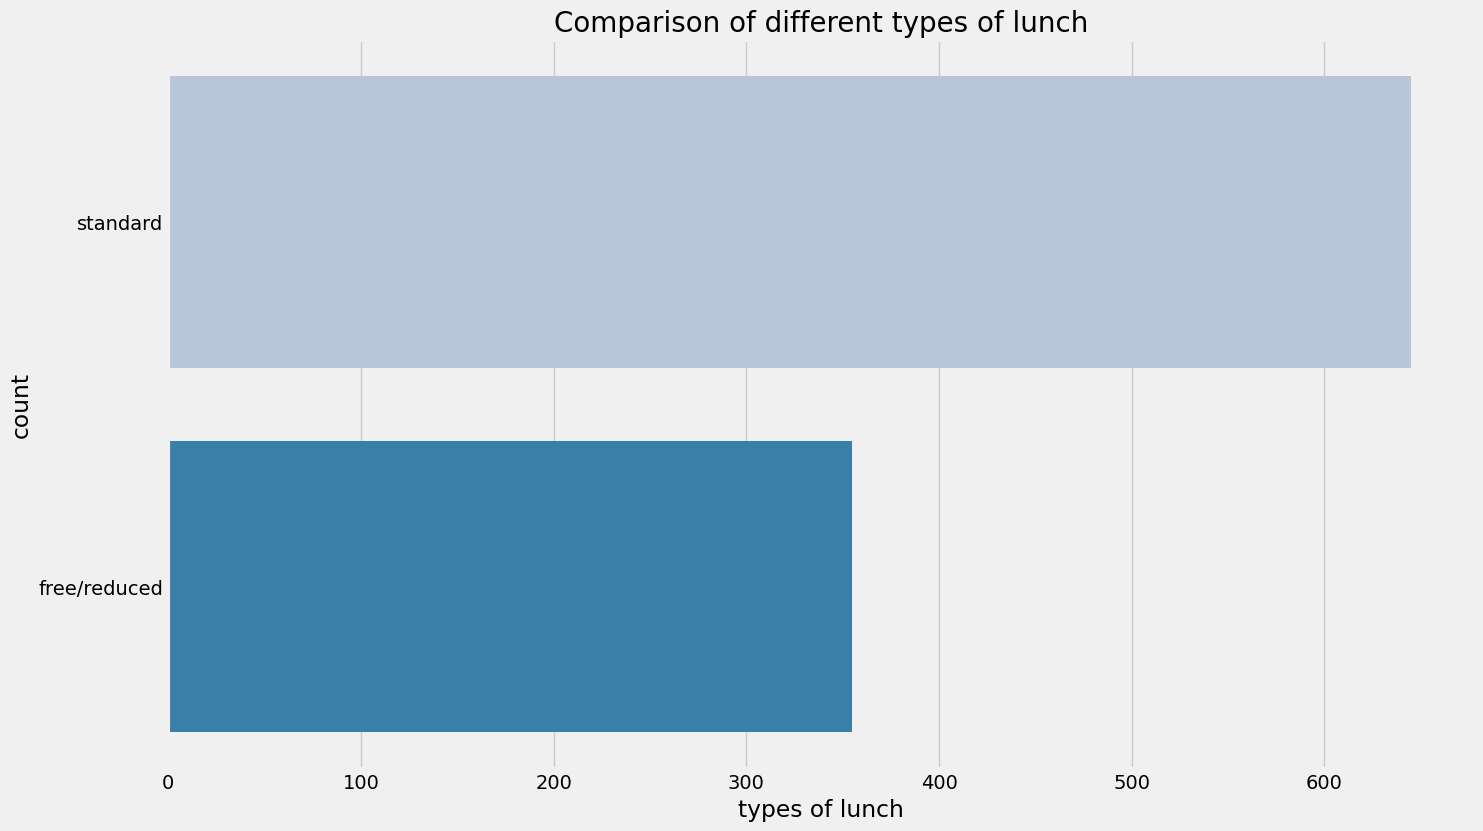

In [137]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### **Insights**
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

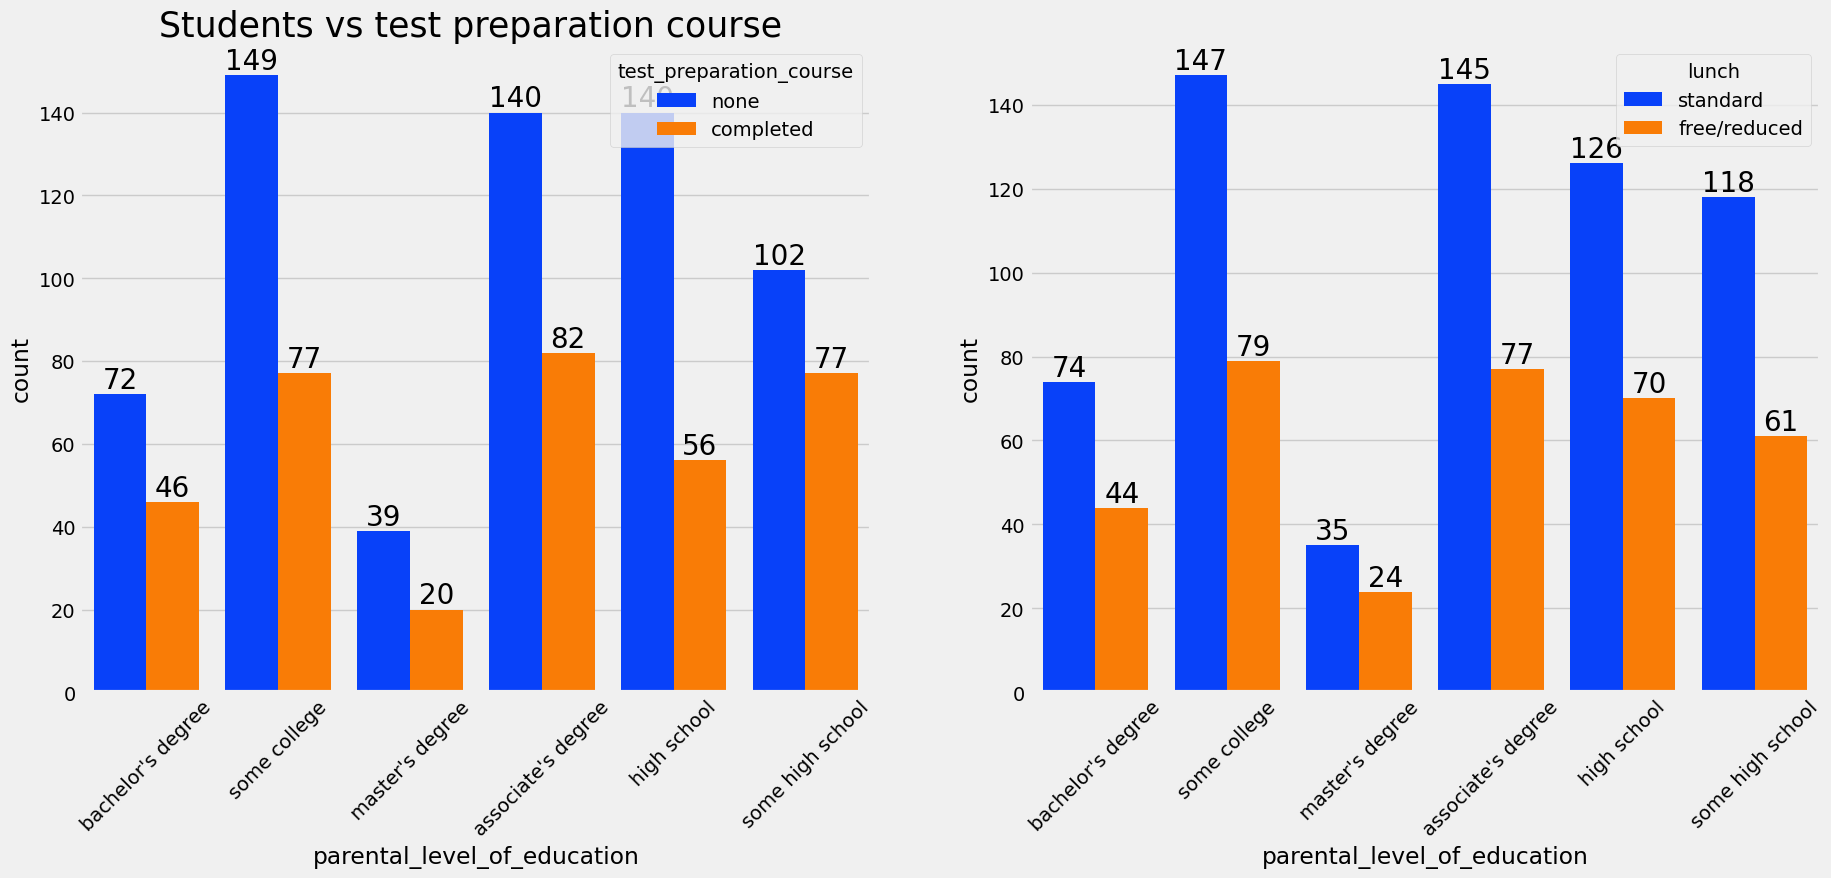

In [145]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
ax[0].tick_params(axis='x',rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   
ax[1].tick_params(axis='x',rotation=45)    

### **Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

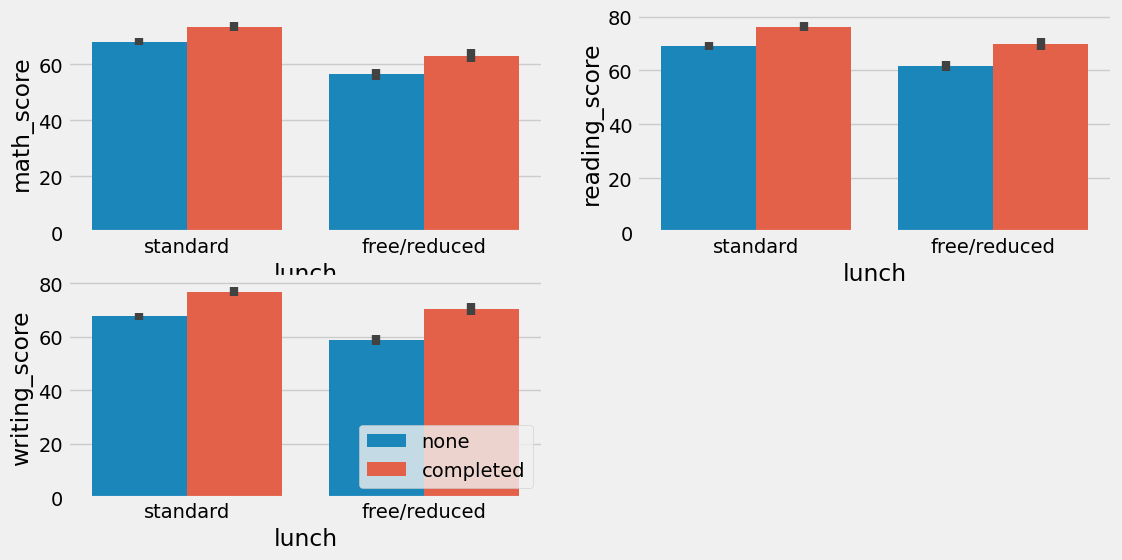

In [156]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.legend([],[], frameon=False) 
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.legend([],[], frameon=False) 
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.legend(loc='lower right',frameon=True)

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

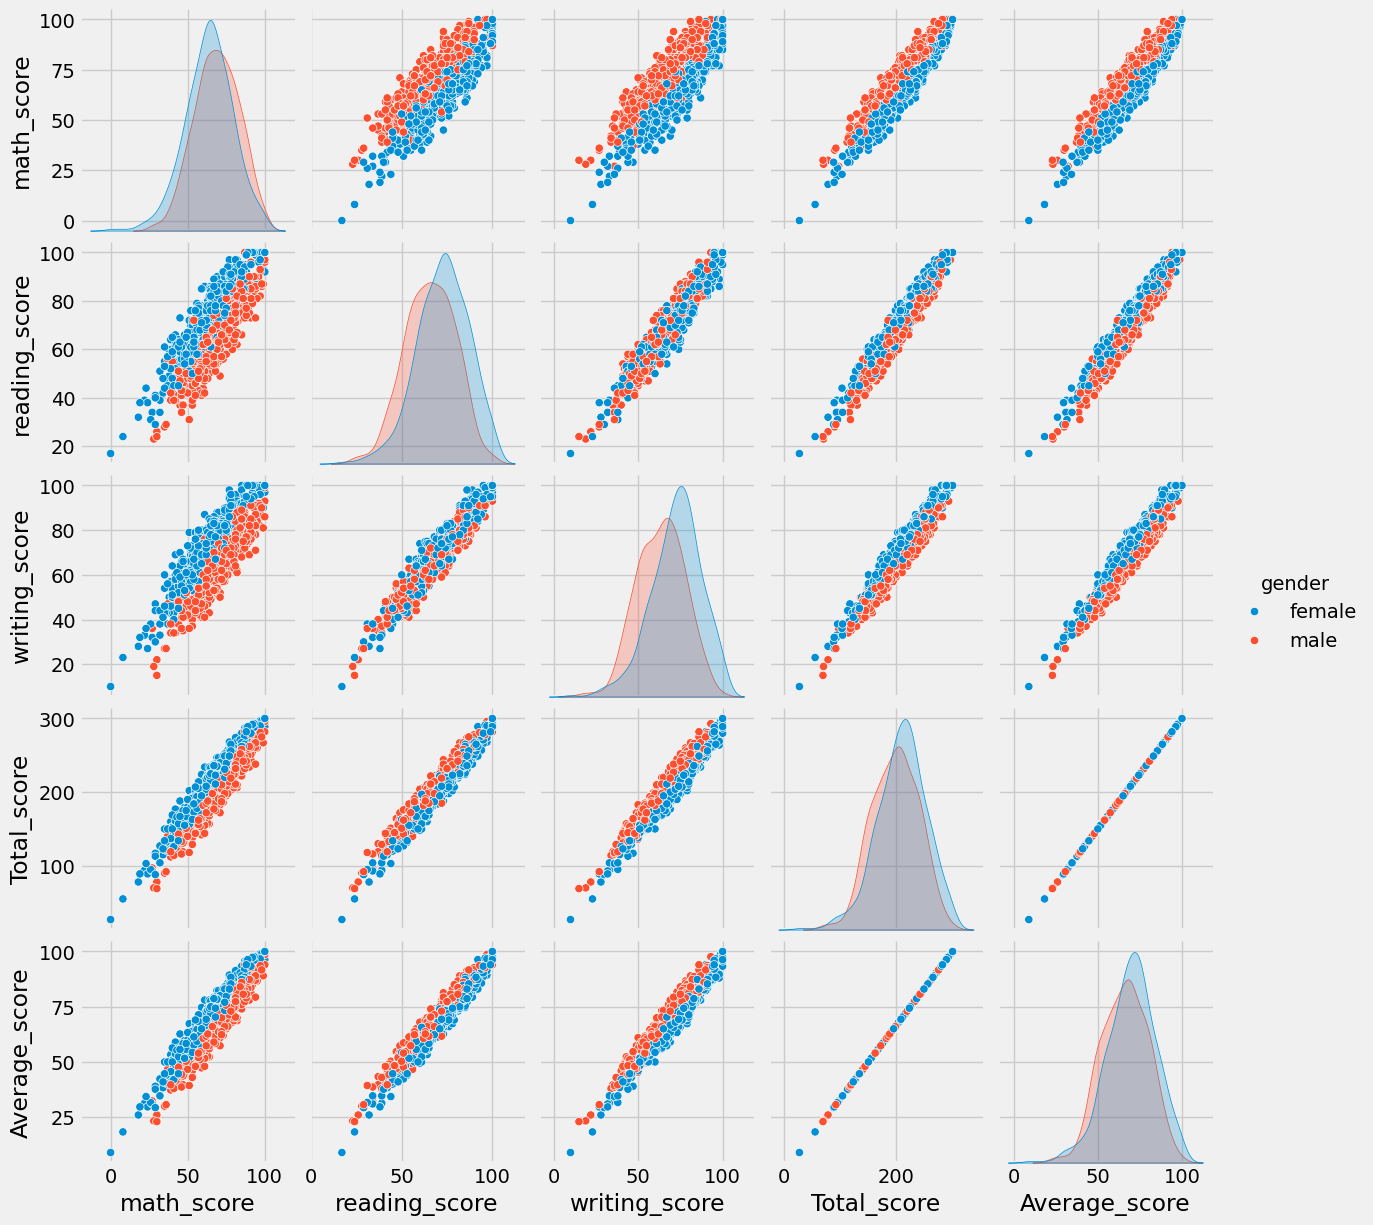

In [157]:
sns.pairplot(df,hue = 'gender')
plt.show()

### **Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.